In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
img_folder_path = 'img/'
imgPaths = [img_folder_path+name for name in os.listdir(img_folder_path) if not name[0] == '.']

print(imgPaths)

['img/1.jpg']


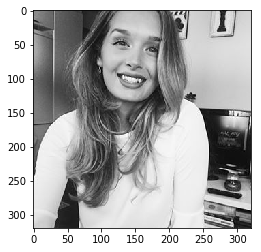

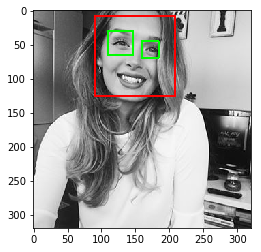

In [3]:
faces = []

for img in imgPaths:
    img = cv2.imread(img)
    
    face_cascade = cv2.CascadeClassifier("utils/haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier('utils/haarcascade_eye.xml')
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    detected_faces = face_cascade.detectMultiScale(gray)
    
    for(x, y, w, h) in detected_faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) > 1:
            faces.append(np.array(roi_color))
            
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            
            for (ex,ey,ew,eh) in eyes:
                cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

            plt.imshow(img)
            plt.show()


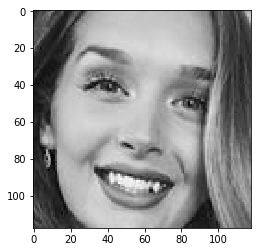

In [4]:
for face in faces:
    plt.imshow(face)
    plt.show()